<a href="https://colab.research.google.com/github/Akshithaa25/Machine_Learning_502/blob/main/502_Lab_9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os
import cv2

path = '/content/drive/MyDrive/Testing'
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])


In [3]:
X = np.array(X)
Y = np.array(Y)

In [4]:
pd.Series(Y).value_counts()

0    105
1     74
dtype: int64

In [6]:
X_updated = X.reshape(len(X), -1)

In [7]:
X.shape, X_updated.shape

((179, 200, 200), (179, 40000))

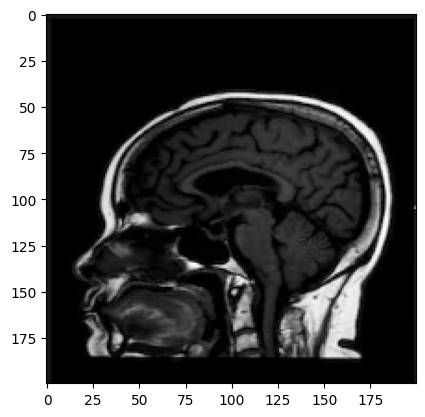

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(179, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((143, 40000), (36, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.svm import SVC

In [14]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [15]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9790209790209791
Testing Score: 0.8611111111111112


In [16]:
pred = sv.predict(xtest)

In [17]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 3, 20, 32, 33, 34]),)

In [21]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[35],ytest[31])

Total Misclassified Samples:  5
0 1


In [19]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

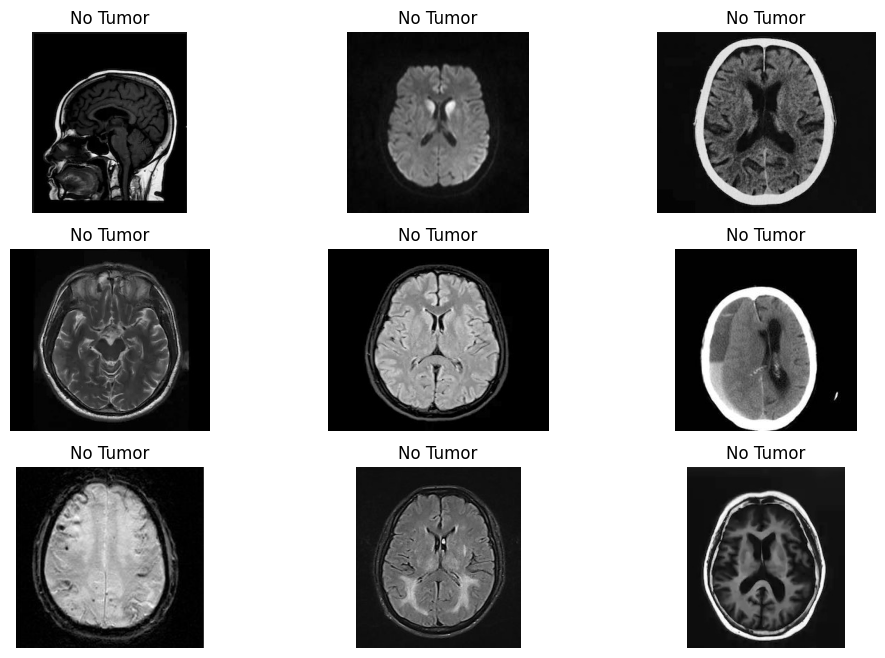

In [23]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/Testing/no_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

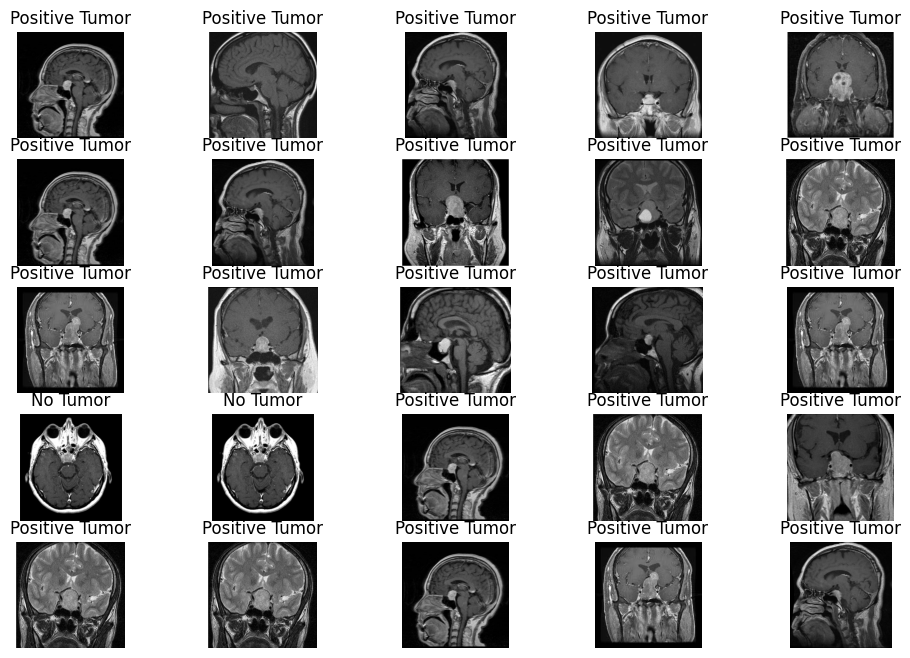

In [25]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/Testing/pituitary_tumor'
for i in os.listdir(path)[:25]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,5,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1;
  else:
    print(f"Failed to Load Image:{i}")
    plt.show()